In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata

In [17]:
### Loading of the dataset
#dir = 'C:\Users\Moien\Dropbox\Experiment_control\N_ChemOS_Kumacheva-Aspuru_Isotropic_NP_Synthesis\plot_tool'
df = pd.read_csv('20211126.csv')
df

,Exp#,#,gold,silver,CTAB,I-2959,v5,height,time,cycle,Unnamed: 10,Area,wl,FWHM
0,0,1,10.00,5.00,17.20,20.00,0,9.9,10.0,40,NaN,13.487160,706,246
1,1,2,9.80,15.00,22.64,29.93,0,8.9,11.4,39,"[[0.08326, 533.0, 83.91850000000001, 3.28557, ...",10.214400,802,146
2,3,3,8.36,5.22,40.29,10.10,0,11.3,14.9,38,"[[0.05687, 802.0, 270.72, 5.51582, 15.94219999...",15.942200,802,270
3,4,4,9.19,14.95,18.17,24.78,0,10.0,11.2,39,"[[0.11786, 523.0, 153.455, 197.19221, 4.157515]]",4.157515,523,153
4,5,5,5.05,9.42,35.71,22.97,0,9.2,18.7,36,"[[0.07824, 521.0, 102.50699999999999, 74.27701...",1.065975,521,103
5,6,6,5.11,8.56,43.54,19.06,0,9.6,16.8,37,"[[0.06754, 528.0, 108.57000000000001, 18.70295...",1.259655,528,109
6,7,7,6.84,11.56,12.27,14.09,0,7.8,14.0,40,"[[0.0864, 525.0, 106.24350000000001, 16.14224,...",3.530865,525,106
7,8,8,5.64,7.64,41.90,16.93,0,9.8,17.3,37,"[[0.0763, 529.0, 140.483, 43.29326, 1.07637]]",1.076370,529,140
8,9,9,6.38,13.47,31.15,15.65,0,12.0,12.8,35,"[[0.04649, 528.0, 135.125, 30.65501, 2.407885]]",2.407885,528,135
9,10,10,5.39,8.20,43.76,20.27,0,9.1,16.4,36,"[[0.07289, 527.0, 108.946, 25.10402, 0.7294800...",0.729480,527,109


In [18]:
df['Area'].max()

15.9422

In [27]:
### Extraction of the data related to Cholesterol+ samples
df_area = df[df['Area'] >= 0]
df_d_wl = df[df['wl'] >= 750]
df_area

,Exp#,#,gold,silver,CTAB,I-2959,v5,height,time,cycle,Unnamed: 10,Area,wl,FWHM
0,0,1,10.00,5.00,17.20,20.00,0,9.9,10.0,40,NaN,13.487160,706,246
1,1,2,9.80,15.00,22.64,29.93,0,8.9,11.4,39,"[[0.08326, 533.0, 83.91850000000001, 3.28557, ...",10.214400,802,146
2,3,3,8.36,5.22,40.29,10.10,0,11.3,14.9,38,"[[0.05687, 802.0, 270.72, 5.51582, 15.94219999...",15.942200,802,270
3,4,4,9.19,14.95,18.17,24.78,0,10.0,11.2,39,"[[0.11786, 523.0, 153.455, 197.19221, 4.157515]]",4.157515,523,153
4,5,5,5.05,9.42,35.71,22.97,0,9.2,18.7,36,"[[0.07824, 521.0, 102.50699999999999, 74.27701...",1.065975,521,103
5,6,6,5.11,8.56,43.54,19.06,0,9.6,16.8,37,"[[0.06754, 528.0, 108.57000000000001, 18.70295...",1.259655,528,109
6,7,7,6.84,11.56,12.27,14.09,0,7.8,14.0,40,"[[0.0864, 525.0, 106.24350000000001, 16.14224,...",3.530865,525,106
7,8,8,5.64,7.64,41.90,16.93,0,9.8,17.3,37,"[[0.0763, 529.0, 140.483, 43.29326, 1.07637]]",1.076370,529,140
8,9,9,6.38,13.47,31.15,15.65,0,12.0,12.8,35,"[[0.04649, 528.0, 135.125, 30.65501, 2.407885]]",2.407885,528,135
9,10,10,5.39,8.20,43.76,20.27,0,9.1,16.4,36,"[[0.07289, 527.0, 108.946, 25.10402, 0.7294800...",0.729480,527,109


c:\users\moien\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:41: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


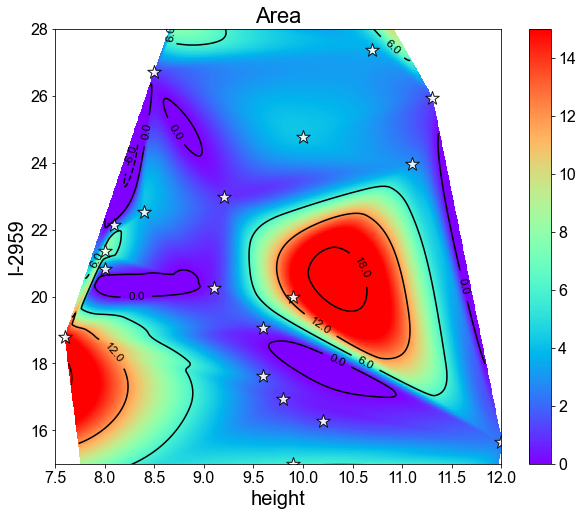

In [25]:
def plot_2d(df, mode, title, save = True):

    ### Defining x,y,z axes
    x = df['height'].to_numpy()
    y = df['I-2959'].to_numpy()
    
    if mode == 'Area':
        z = df['Area'].to_numpy()
        plot_title = 'Area'
        vmax=15
        vmin=0
        cmap = plt.get_cmap('rainbow')
    elif mode == 'wl':
        z = df['wl'].to_numpy()
        plot_title = 'Wl'
        vmax=0.1
        vmin=0.5
        color_map = plt.cm.get_cmap('RdYlGn')
        cmap = color_map.reversed()

    ###definning the grid
    ny, nx = 1000, 1000
    xmin, xmax = 7.5, 12
    ymin, ymax = 10, 28

    ###creating of the mesh
    xi = np.linspace(xmin, xmax, nx)
    yi = np.linspace(ymin, ymax, ny)
    X,Y = np.meshgrid(xi,yi)
    zi = griddata((x,y), z, (X, Y), method='cubic')

    ### Plotting the surface for the size
    fig = plt.figure(figsize=(10,8))
    parameters = {'xtick.labelsize': 16,
              'ytick.labelsize': 16,
              'font.family':'sans-serif',
              'font.sans-serif':['Arial']}

    plt.rcParams.update(parameters)

    plt.pcolormesh(X,Y,zi, cmap = cmap, vmax=vmax, vmin=vmin)
    plt.colorbar()
    plt.scatter(x,y, c='w', s= 200, edgecolors='k', alpha=0.9, marker = '*')
    plt.xlim(7.5, 12)
    plt.ylim(15, 28)
#     plt.xlim(xmin-1, xmax+1)
    ###plt.ylim(0.47, 2.02)
    
    plt.title(plot_title, fontsize=22)
    
    plt.ylabel('I-2959', fontsize=20)
    plt.xlabel('height', fontsize=20)
    c30 = plt.contour(X, Y, zi, 5, colors='black')
    plt.clabel(c30, inline=True, fontsize=12, fmt='%.1f')

    plt.show()
    if save:
        fig.savefig(f'{title}.png')

plot_2d(df_area,'Area', 'Area_gold_I-2959', save = True)

###plot_2d(df[df['Lipid concentration'] == 10], 'pdi', '10_pdi', save = False)

### save = True




In [50]:
### Loading of the dataset
#dir = 'C:\Users\Moien\Dropbox\Experiment_control\N_ChemOS_Kumacheva-Aspuru_Isotropic_NP_Synthesis\plot_tool'
df = pd.read_csv('20211126.csv')
df
print(len(df.index)) 

34


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

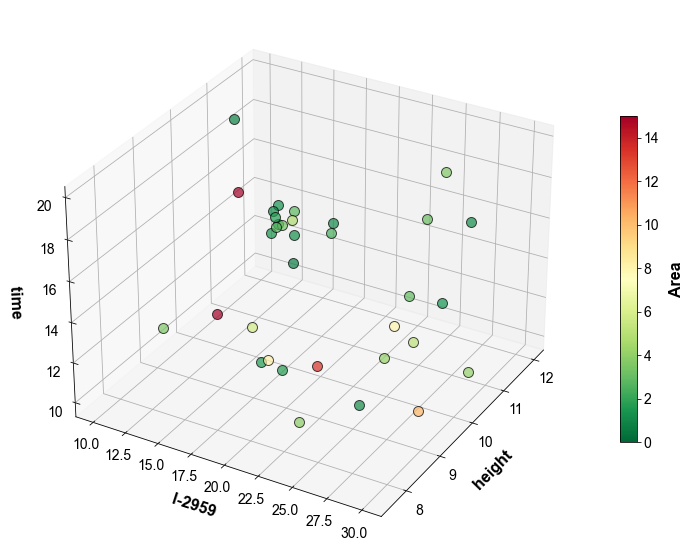

In [60]:
def plot_data(df, title, area_range, wl_range, mode, save = False, movie = False):   
    from mpl_toolkits.mplot3d import Axes3D
    from matplotlib import cm
    from matplotlib.animation import FuncAnimation
    
    fig = plt.figure(figsize = (15,10))
    ax = fig.add_subplot(projection='3d')
    
    parameters = {'xtick.labelsize': 14,
              'ytick.labelsize': 14,
              'font.family':'sans-serif',
              'font.sans-serif':['Arial']}
    plt.rcParams.update(parameters) 
    
    ax = plt.axes(projection='3d')
    fig.patch.set_facecolor('white')

    #cmap = plt.cm.RdYlGn
    
    if mode == 'Area':
        color_map = plt.cm.get_cmap('RdYlGn')
        cmap = color_map.reversed()
        norm = plt.Normalize(vmin=0, vmax=15)
        cbar_label = 'Area'
    if mode == 'wl':
        cmap = plt.cm.get_cmap('tab10')
        norm = plt.Normalize(vmin=26, vmax=275) 
        cbar_label = 'wl'
    count = 0
    for i in range(len(df.index)):
        x = df.iloc[i]['I-2959']
        y = df.iloc[i]['height']
        z = df.iloc[i]['time']
        area = df.iloc[i]['Area']
        wl = df.iloc[i]['wl']
                              
#         if (area_range[0] < area <= area_range[1]) and (wl_range[0] < wl <= wl_range[1]):
#                 #color = 'green'
#                 alpha = 0.6
#                 count +=1
#                 if mode == 'Area':
#                     p = ax.scatter3D(x, y, z, c=cmap(norm(area)), alpha = 0.7, s=100, edgecolors ='k')
#                 elif mode == 'wl':
#                     p = ax.scatter3D(x, y, z, c=cmap(norm(wl)), alpha = 0.7, s=100, edgecolors ='k')
                
#         else:
#                 color = 'grey'  
#                 alpha = 0
#                 ax.scatter3D(x, y, z, c=color, alpha = alpha, s=100, edgecolors ='k')
        color = 'grey'
        ax.scatter3D(x, y, z, c=cmap(norm(area)), alpha = 0.7, s=100, edgecolors ='k')    
        

    ax.zaxis._axinfo['juggled'] = (1,2,0)
    ax.yaxis._axinfo['juggled'] = (0,1,2)
    #ax.set_title(title, fontsize=16)
    ax.xaxis._axinfo['label']['space_factor'] = 1

    ax.set_xlabel('I-2959     ', fontsize=16,fontweight='bold', labelpad =10)
    ax.set_ylabel('height    ', fontsize=16,fontweight='bold', labelpad =10)
    ax.set_zlabel('time    ', fontsize=16,fontweight='bold', labelpad =10)
    #ax.set_ylim(0.47,2.02)
    #ax.set_xlim(3,50)
    #ax.set_zlim(10,50)
    
    cbar = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), shrink=0.6, aspect=20)
    cbar.set_label(cbar_label, fontsize=16, fontweight='bold', labelpad =10)
        
    #print(count/len(df.index))    
    
    if save:
        fig.savefig(title +'.png')        
        
    if movie:
        ax.scatter3D(0, 0, 0, c='black', s=200)
        
        def update(i):
            ax.view_init(elev=10., azim=i)
            return ax
        
        anim = FuncAnimation(fig, update, frames=np.arange(0, 360), interval=20)
        anim.save('3D.gif', dpi=80, writer='imagemagick')
        

#plot_data(df, '50 nm (PDI 0.3)', [45,55], [0,0.3], mode = 'pdi', save = True)

#plot_data(df, '100 nm (PDI 0.3)', [95,105], [0,0.3], mode = 'pdi', save = True)
plot_data(df, 'Area_3D', [0,15], [0,50], mode = 'Area', save = False)


#plot_data(df, 'title', [0,250], [0.2,0.4], mode = 'size', save = False)



In [22]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(1)



c:\users\moien\appdata\local\programs\python\python37\lib\site-packages\pandas\io\formats\style.py:1126: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
c:\users\moien\appdata\local\programs\python\python37\lib\site-packages\pandas\io\formats\style.py:1127: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


,Exp#,#,gold,silver,CTAB,I-2959,v5,height,time,cycle,Area,wl,FWHM
Exp#,1.0,1.0,0.0,-0.1,0.1,0.2,nan,-0.1,-0.1,0.0,-0.2,-0.1,0.1
#,1.0,1.0,0.0,-0.1,0.1,0.2,nan,-0.1,-0.1,0.0,-0.2,-0.1,0.1
gold,0.0,0.0,1.0,0.2,-0.6,0.2,nan,0.1,-0.4,0.3,0.6,0.3,0.0
silver,-0.1,-0.1,0.2,1.0,-0.3,-0.2,nan,0.6,-0.1,-0.3,-0.3,-0.2,0.2
CTAB,0.1,0.1,-0.6,-0.3,1.0,-0.2,nan,0.1,0.3,-0.4,-0.4,-0.1,-0.0
I-2959,0.2,0.2,0.2,-0.2,-0.2,1.0,nan,-0.4,0.0,0.5,0.0,0.2,-0.4
v5,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
height,-0.1,-0.1,0.1,0.6,0.1,-0.4,nan,1.0,-0.0,-0.5,-0.2,-0.3,0.4
time,-0.1,-0.1,-0.4,-0.1,0.3,0.0,nan,-0.0,1.0,0.0,-0.2,-0.2,0.0
cycle,0.0,0.0,0.3,-0.3,-0.4,0.5,nan,-0.5,0.0,1.0,0.3,0.2,-0.2


In [23]:
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(1))

,Exp#,#,gold,silver,CTAB,I-2959,v5,height,time,cycle,Area,wl,FWHM
Exp#,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
#,1.0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
gold,0.0,0.0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
silver,-0.1,-0.1,0.2,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
CTAB,0.1,0.1,-0.6,-0.3,nan,nan,nan,nan,nan,nan,nan,nan,nan
I-2959,0.2,0.2,0.2,-0.2,-0.2,nan,nan,nan,nan,nan,nan,nan,nan
v5,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
height,-0.1,-0.1,0.1,0.6,0.1,-0.4,nan,nan,nan,nan,nan,nan,nan
time,-0.1,-0.1,-0.4,-0.1,0.3,0.0,nan,-0.0,nan,nan,nan,nan,nan
cycle,0.0,0.0,0.3,-0.3,-0.4,0.5,nan,-0.5,0.0,nan,nan,nan,nan


<AxesSubplot:xlabel='Size', ylabel='PDI'>

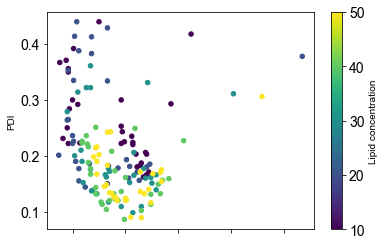

In [123]:
df.plot.scatter(x='Size', y = 'PDI', c = 'Lipid concentration', colormap='viridis')